# Regressão Polinomial

Inicialmente vamos gerar dados não lineares baseado em um simples equação quadrática:

$$y = ax^{2} + bx + c$$

Além disso, adicionamos algum ruído.

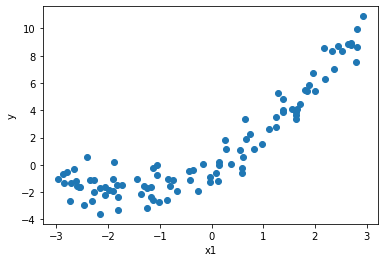

In [ ]:
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 * X + np.random.randn(m , 1)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y');

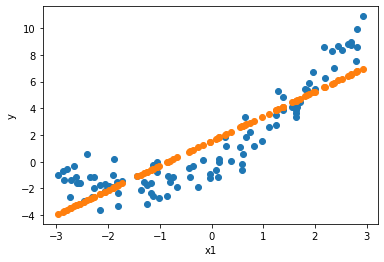

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

previsoes = linear_reg.predict(X)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.scatter(X, previsoes)
plt.xlabel('x1')
plt.ylabel('y');

Como podemos ver uma linha reta não irá acomodar corretamente esses dados. Então podemos utilizar a funcionalidade `PolynomialFeatures` para transformar nossos dados de treinamento elevando os valores ao quadrado (Polinômio de 2 grau).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


`X_poly` contém a característica original de `X` mais o quadrado desta característica. Assim podemos ajustar um modelo de regressão linear.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

[-0.21865419]
[[1.93366893 0.56456263]]


In [ ]:
previsoes = linear_reg.predict(X_poly)

In [ ]:
len(X_poly)

100

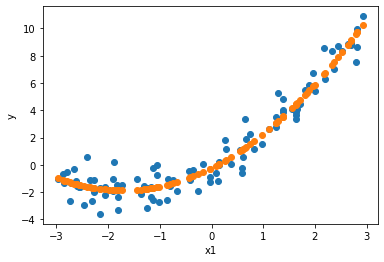

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.scatter(X, previsoes)
plt.xlabel('x1')
plt.ylabel('y');

É importante que a regressão polinomial é capaz de encontrar relações entre elas (algo que um modelo simples de regressão linear não pode fazer).

Isto é possível porque a `PolynomialFeatures` também adiciona todas as combinações das features até o grau fornecido.

Por exemplo, se houvesse duas características `a` e `b` e `degree=3`, as seguintes características seriam criadas: $a^{2}$, $a^{3}$, $b^{2}$, $b^{3}$, $ab$, $a^{2}b$ e $ab^{2}$.


**Atenção: tome cuidado com a explosão combinatória do número de features (características).**

# Exemplo com Regressão Múltipla

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
m = 100
X1 = 6 * np.random.rand(m, 1) - 3
X2 = 3.2 * np.random.rand(m, 1) - 1

y = 1.3 * X1 ** 2 + 0.5 * X ** 2 + 2 * X1 * X2 + np.random.randn(m , 1)

df = pd.DataFrame({
    'x1': X1.ravel(),
    'x2': X2.ravel(),
    'y': y.ravel()
})
df.head()

,x1,x2,y
0,-0.752759,-0.899427,1.694043
1,2.704286,1.036513,19.002002
2,1.391964,0.005939,3.797220
3,0.591951,0.627426,0.659190
4,-2.063888,1.904213,1.672952


In [ ]:
# treinando um modelo usando apenas as features já existentes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop('y', axis=1).copy()
y = df['y'].copy()

linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)

r2_score(y, y_pred)

0.06014739226422172

In [ ]:
# adicionando features de interação
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = pd.DataFrame(poly_features.fit_transform(X), columns=['x1', 'x2', 'x1_quadrado', 'x1x2', 'x2_quadrado'])
X_poly.head()

,x1,x2,x1_quadrado,x1x2,x2_quadrado
0,-0.752759,-0.899427,0.566647,0.677052,0.808968
1,2.704286,1.036513,7.313162,2.803028,1.074360
2,1.391964,0.005939,1.937563,0.008267,0.000035
3,0.591951,0.627426,0.350406,0.371406,0.393664
4,-2.063888,1.904213,4.259634,-3.930082,3.626026


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
r2_score(y, linear_reg.predict(X_poly))

0.9756123530206587

Podemos observar que como esperado, o modelo se ajustou bem melhor nos dados do que o anterior sem as features de interações.